In [1]:
#import important basics libraries
import os
import numpy as np      #linear algebra
import pandas as pd     #data processing, I/O files
import seaborn as sns            #For Data Visualization

#import important visualization libraries   
import matplotlib.pylab as plot  #For Data Visualization
%matplotlib inline
import plotly.figure_factory as figuref

#provides a way to control warning
import warnings                  #for ignoring warnings
warnings.filterwarnings("ignore")


In [2]:
#import important machine learning libraries
import sklearn                                               #ML library provides a wide range of tools

from sklearn.model_selection import train_test_split         #function in scikit-learn,used to split a dataset into a training set and a test set

from sklearn.feature_extraction.text import CountVectorizer #for converting a collection of text documents to a matrix of word counts
from sklearn.feature_extraction.text import TfidfVectorizer #TF-IDF, converting a collection of text documents to a matrix of TF-IDF features
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.linear_model import LogisticRegression     #LR
from sklearn.naive_bayes import MultinomialNB           #NB
from sklearn.svm import LinearSVC , SVC                 #SVC
from sklearn.neighbors import KNeighborsClassifier      #k-nearest neighbor algorithm (KNN)
from sklearn.tree import DecisionTreeClassifier         #DT
from sklearn.ensemble import RandomForestClassifier     #RF

from sklearn import metrics
from sklearn.metrics import accuracy_score                   #to gorge model's effectiveness by calculating the ratio of total TP to total TN across all the model prediction
from sklearn.metrics import classification_report           
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve



In [3]:
import gensim               #for word2vec, powerful library unsupervised model, used in Word2Vec and GloVe, to learn word embeddin,or a variety of other NLP tasks
#word2vec libraries
from gensim.models.word2vec import Word2Vec                 #for extraction features


In [4]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)


import keras        #high-level API for building deep learning models, solve a wide variety of ML problems
from keras.models import Sequential                                 #class/model in Keras is used to create a linear stack of layers,build DL models,
from keras.layers import LSTM, Conv1D, MaxPooling1D, GlobalMaxPool1D, Flatten, Bidirectional  #ALL are CNNs are a type of DL model,designed for processing and understanding images
from keras.layers import Embedding , Dense , BatchNormalization , Dropout   #for extracting features Embedding, Dense, Dropout 
from keras.optimizers import adam_v2                               #version 2 of adam optimizer in Keras, used to train dl models
from keras.layers.embeddings import Embedding       #submodule of the keras.layers module,its give access to all features for embedding including the pre-trained word embeddings
from keras.preprocessing.text import Tokenizer                     #powerful tool for preprocessing text data, use in Keras models
from keras.preprocessing.sequence import pad_sequences



2.8.0-rc1
2.8.0


In [5]:
#import the the nessary libraries for text preprocessing 
#NLTK libraries
import re                                                   #module for regular expressions, allow to determine wether given text fits given regular occupation
import string                                               #module for string operations, seves as the foundation of manipulating data

import nltk
import spacy                                                #for lemmatization
from nltk import corpus
from nltk.corpus import stopwords                           #use it for remove stop words in the english language
from nltk.tokenize import RegexpTokenizer                   #tokenizing words  
from nltk.tokenize import word_tokenize, sent_tokenize      #tokenizing words
from wordcloud import WordCloud,STOPWORDS                   #wordcloud for generating text clouds
from nltk.stem import WordNetLemmatizer                     #lemmatizing words

from nltk import bigrams


In [6]:
#read dataset of the fake and true news
ds= pd.read_csv('../data/WELFake_Dataset.csv')


In [7]:
#delete the Unnamed column
ds.drop("Unnamed: 0", axis=1, inplace=True)


In [8]:
#get shape and head of the dataframe
print ("The shape of the  data is (row, column):"+ str(ds.shape))
ds.head()


The shape of the  data is (row, column):(72134, 3)


,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [9]:
#print the dataset inforamtion
print (ds.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [10]:
#check if there are any value in a column is null
ds.isnull().sum()


title    558
text      39
label      0
dtype: int64

In [11]:
#CategoricalImputer
#from sklearn_pandas import CategoricalImputer



In [12]:
#replace null cells in No title and No text
ds["title"].fillna("No title", inplace = True) 
ds["text"].fillna("No text", inplace = True) 
#now print if are there any null cells
ds.isnull().sum()


title    0
text     0
label    0
dtype: int64

In [13]:
#creat new column 'orginal' contains the title and text of the news together.
ds['original'] = ds['title'] + ' ' + ds['text']
ds.original             #show the new dataframe


0        LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1        No title Did they post their votes for Hillary...
2        UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3        Bobby Jindal, raised Hindu, uses story of Chri...
4        SATAN 2: Russia unvelis an image of its terrif...
                               ...                        
72129    Russians steal research on Trump in hack of U....
72130     WATCH: Giuliani Demands That Democrats Apolog...
72131    Migrants Refuse To Leave Train At Refugee Camp...
72132    Trump tussle gives unpopular Mexican leader mu...
72133    Goldman Sachs Endorses Hillary Clinton For Pre...
Name: original, Length: 72134, dtype: object

In [14]:
#counting the label column 0 for fake, 1 for real
ds.label.value_counts()


1    37106
0    35028
Name: label, dtype: int64

The shape of the  data is (Row, Column):(72134, 4)



Text(0.5, 1.0, 'Fake News Classification Dataset Distribution')

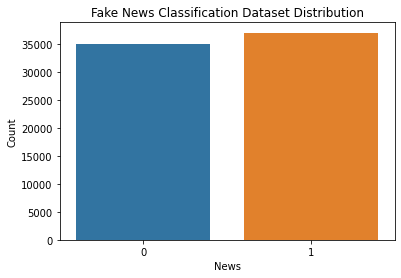

In [15]:
#plot data shape and Fake/Real News distribution
print ("The shape of the  data is (Row, Column):"+ str(ds.shape) + "\n")
sns.countplot(ds.label)

plot.xlabel("News")
plot.ylabel("Count")
plot.title('Fake News Classification Dataset Distribution')


In [16]:
nlp = spacy.load("en_core_web_lg")

nlp.pipe_names

#customize lemmatizing 
ar = nlp.get_pipe('attribute_ruler')

#name tagged
ar.add([[{"TEXT":"U.S."}],[{"TEXT":"US"}]],{"LEMMA":"united states"})

In [17]:
#1 DATA PREPROCESSING  
#1.1 Data cleaning 


#remove non alphanumeric characters and converting all 'original' to lower case, reomove punctuation, links, numbers with words "no0r" the output "nor"
#create a def function to clean the data
def remove_and_clean_ds(text):
  text = text.lower()               #convert all 'original' to lower case
  regex = r"\d+"                    #remove numbers
  text = re.sub(regex, "", text)
  text = re.sub('https?://\S+|www\.\S+', '', text)  #remove links
  text = re.sub('<.*?>+', '', text)                 #remove html tags
  text = re.sub("'", " ", text)                     #remove apostrophes ' only

  text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #remove punctuation
  text = re.sub('\n', '', text)                                   #remove new lines
  text = re.sub('\w*\d\w*', '', text)                             #remove words with digits
  
  text = re.sub("\.+", "", text)                    #remove all non alphabit and repeated periods
  text = re.sub("(\\W)+", " ", text)                #remove all non alphabit

  #remove special characters
  remove_chars = '[0-9’!"#$%&\'()*+,-./:;<=>?@， â€™ 。?★、…【】《》？“”‘’！[\\]^_`{|}~]+'  
  text = re.sub(remove_chars, ' ', text)

  text = re.sub('\s+', ' ', text).strip()          #remove extra whitespace

  return text

ds['clean_text'] = ds['original'].apply(remove_and_clean_ds)

ds.head(44000)
ds.clean_text



0        law enforcement on high alert following threat...
1        no title did they post their votes for hillary...
2        unbelievable obama s attorney general says mos...
3        bobby jindal raised hindu uses story of christ...
4        satan russia unvelis an image of its terrifyin...
                               ...                        
72129    russians steal research on trump in hack of us...
72130    watch giuliani demands that democrats apologiz...
72131    migrants refuse to leave train at refugee camp...
72132    trump tussle gives unpopular mexican leader mu...
72133    goldman sachs endorses hillary clinton for pre...
Name: clean_text, Length: 72134, dtype: object

In [18]:
#1 DATA PREPROCESSING  
#1.2- remove stop words

#stopwords.words() function returns a list of stop words for the english language and list is case-insensitive.
#create a set of stop words from the list returned by stopwords.words('english') plus the words "even" "at", "a", "an", "as",etc to the list returned
stop_words = stopwords.words("english") + ["even" "at", "a", "an", "as", "via", 'about', 'above','after', 'again', 'ain', 'n' , 'cuz' ,'b' ,'c', 'u',
                                           'y' ,'r','zz', 'zzzzzz', 'hw', 'shes', 'thatll', 'til','before', 'f', 'ff', 'ffs', 'thatll', 'mr','til',
                                            'btw', 'from' 'uv','much' , 'many', 'might','since', 'hey', 'outta', 'shouldve', 'mightve', 'another',
                                            'other','throgh','also', 'i','we', 'you', 'however','what', 'when', 'where', 'why', 'how', 'whom', 'whose',
                                            'would','should', 'could', 'wouldnt', 'shouldnt', 'couldnt', 'one','two','may'] 


#function takes a string as input and returns a list of tokens
#the function first uses the gensim.utils.simple_preprocess() function to preprocess the text
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)     
    return result

def slip_words(text):
    #splits the string into a list of words and takes a string as input and returns a list of words, the words in the list are separated by spaces
    #to reduce the size of the vocabulary that needs to be considered, to improve the accuracy of NLP, faster and easier to process the text.
    text = ' '.join(word for word in text.split(' ') if word not in stop_words) 
    return text

ds['clean_text'] = ds['clean_text'].apply(slip_words, preprocess)
ds.head(44000)  #show the new dataframe 
ds.clean_text


0        law enforcement high alert following threats c...
1                         title post votes hillary already
2        unbelievable obama attorney general says charl...
3        bobby jindal raised hindu uses story christian...
4        satan russia unvelis image terrifying new supe...
                               ...                        
72129    russians steal research trump hack us democrat...
72130    watch giuliani demands democrats apologize tru...
72131    migrants refuse leave train refugee camp hunga...
72132    trump tussle gives unpopular mexican leader mu...
72133    goldman sachs endorses hillary clinton preside...
Name: clean_text, Length: 72134, dtype: object

In [19]:
#1.3- Tokenizer

#load the english language model
nlp = spacy.load('en_core_web_lg')

#convert the dataframe to a string
str_clean_text = str(ds['clean_text'])

#tokenize the text
doc = nlp(str_clean_text)

#print tokens
for token in doc:
    print(token.text)


0
       
law
enforcement
high
alert
following
threats
c
...


1
                        
title
post
votes
hillary
already


2
       
unbelievable
obama
attorney
general
says
charl
...


3
       
bobby
jindal
raised
hindu
uses
story
christian
...


4
       
satan
russia
unvelis
image
terrifying
new
supe
...

                               
...
                       

72129
   
russians
steal
research
trump
hack
us
democrat
...


72130
   
watch
giuliani
demands
democrats
apologize
tru
...


72131
   
migrants
refuse
leave
train
refugee
camp
hunga
...


72132
   
trump
tussle
gives
unpopular
mexican
leader
mu
...


72133
   
goldman
sachs
endorses
hillary
clinton
preside
...


Name
:
clean_text
,
Length
:
72134
,
dtype
:
object


In [20]:
#1.4 Lemmatization

def lemmatize_text(str_clean_text):
    doc = nlp(str_clean_text)
    lemmatized_words = [token.lemma_ for token in doc]
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

ds['clean_text'] = ds['clean_text'].apply(lemmatize_text)

ds.head(44000)
ds.clean_text



0        law enforcement high alert follow threat cop w...
1                          title post vote hillary already
2        unbelievable obama attorney general say charlo...
3        bobby jindal raise hindu use story christian c...
4        satan russia unvelis image terrifying new supe...
                               ...                        
72129    russians steal research trump hack we democrat...
72130    watch giuliani demand democrats apologize trum...
72131    migrant refuse leave train refugee camp hungar...
72132    trump tussle give unpopular mexican leader muc...
72133    goldman sachs endorse hillary clinton presiden...
Name: clean_text, Length: 72134, dtype: object

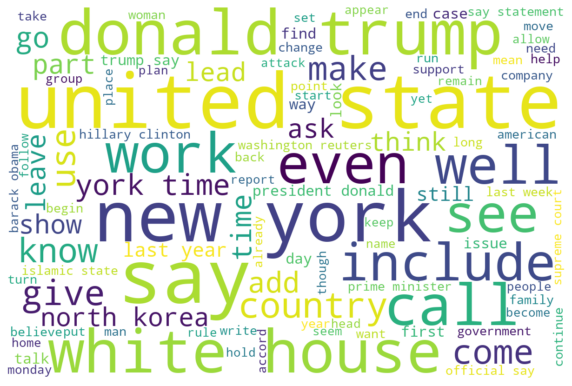

In [21]:
#2 visualization
#A - data of fake news

#wordCloud for fake news after lemmatization
wordc = WordCloud(background_color='white', max_words=100, width =1200, height=800)

wordc.generate(' '.join(ds[ds.label == 0].clean_text))
plot.figure(figsize=(10,10))
plot.imshow(wordc,interpolation="bilinear")
plot.axis("off")
plot.show()



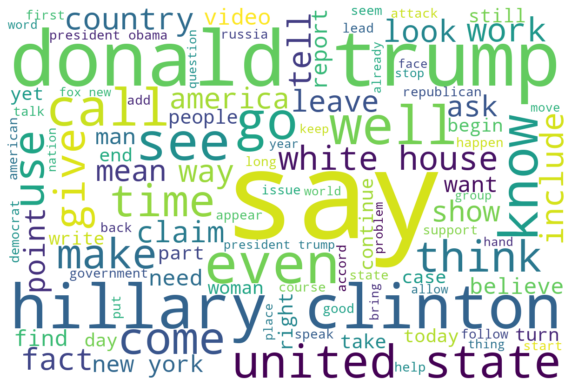

In [22]:
#2 visualization
#B - data of real news

wordc = WordCloud(background_color='white', max_words=100, width =1200, height=800)

wordc.generate(' '.join(ds[ds.label == 1].clean_text))
plot.figure(figsize=(10,10))
plot.imshow(wordc,interpolation="bilinear")
plot.axis("off")
plot.show()


say 301571
trump 225067
people 91037
president 89342
state 83179
make 81896
new 79920
clinton 76822
year 75905
go 71869
take 65412
time 58670
like 58292
we 56901
get 56417
obama 53887
tell 52784
government 52716
us 50842
know 49798


<AxesSubplot:title={'center':'Top 20 words in news'}, xlabel='news', ylabel='Count'>

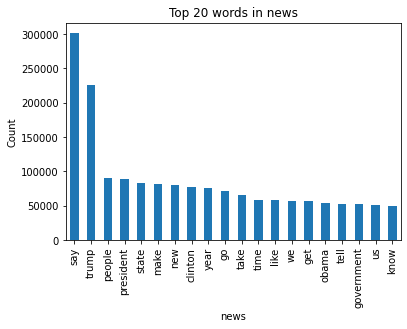

In [23]:
#C top n_gram
#1- Unigram

#Gets the top n words from a text corpus. from a list of strings (n:number of top words) and returns a sorted list by a frequency of these words.

#create a function to get top words in the dataset (Unigram)
def get_top_words(corpus, n=None):

    #create CountVectorizer object and fir the vectorizer to the text corpus
    count_vect = CountVectorizer().fit(corpus)
    
    bags_of_word = count_vect.transform(corpus)
    words_sum = bags_of_word.sum(axis=0)

    frequency = [(word, words_sum[0, idx]) for word, idx in count_vect.vocabulary_.items()]
    frequency =sorted(frequency, key = lambda x: x[1], reverse=True)
    return frequency[:n]

#call the function and return only top 20 words
top_word = get_top_words(ds['clean_text'], 20)

#print top n word and frequency
for word, frequency in top_word:
    print(word, frequency)

#create a pandas DataFrame from the top n words
ds1 = pd.DataFrame(top_word, columns = ['news' , 'count'])

#plot the top n words in a bar chart.
ds1.groupby('news').sum()['count'].sort_values(ascending=False).plot(kind='bar', ylabel='Count', title='Top 20 words in news')


donald trump 40573
united states 31007
new york 25969
white house 24355
hillary clinton 23197
york times 11515
last year 9843
trump say 9286
north korea 8703
barack obama 8354
president donald 8206
last week 8006
president trump 7620
president obama 7591
supreme court 7500
islamic state 7325
can not 7154
prime minister 7069
secretary state 7056
official say 7047


<AxesSubplot:title={'center':'Top 20 words in news'}, xlabel='news', ylabel='Count'>

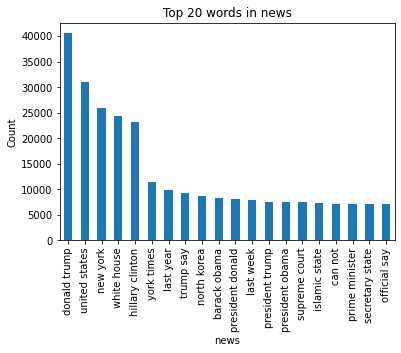

In [24]:
#C top n_gram
#2- bigram
    
#Gets the top n words from a text corpus. from a list of strings (n:number of top words) and returns a sorted list by a frequency of these words.
#create a function to get top words in the dataset (Unigram)
def get_top_words(corpus, n=None):

    #create CountVectorizer object and fir the vectorizer to the text corpus
    count_vect = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    
    bags_of_word = count_vect.transform(corpus)
    words_sum = bags_of_word.sum(axis=0)

    frequency = [(word, words_sum[0, idx]) for word, idx in count_vect.vocabulary_.items()]
    frequency =sorted(frequency, key = lambda x: x[1], reverse=True)
    return frequency[:n]

#call the function and return only top 20 words
top_word = get_top_words(ds['clean_text'], 20)

#print top n word and frequency
for word, frequency in top_word:
    print(word, frequency)

#create a pandas DataFrame from the top n words
ds2 = pd.DataFrame(top_word, columns = ['news' , 'count'])

#plot the top n words in a bar chart.
ds2.groupby('news').sum()['count'].sort_values(ascending=False).plot(kind='bar', ylabel='Count', title='Top 20 words in news')


In [25]:
#define clean_text_encoded and target_encoded (from "ds")
clean_text_encoded = ds['clean_text']
target_encoded = ds['label']

print(len(clean_text_encoded), len(target_encoded))


72134 72134


In [26]:
#train_test_split
x_train, x_test, y_train, y_test = train_test_split(clean_text_encoded, target_encoded, test_size=0.25, random_state=1)

print("The number of samples in the train set is:", len(x_train), len(y_train))
print("The number of s amples in the test set is:", len(x_test), len(y_test))


The number of samples in the train set is: 54100 54100
The number of s amples in the test set is: 18034 18034


VECTORIZATION
convert the dataset vocabulary to numbers

### 3. feature extraction

In [27]:
#3. feature extraction
#A- count vectorizer

#first applying count vectorizer then applying the results 
count_vect = CountVectorizer().fit(x_train)


In [28]:

x_train_vec = count_vect.transform(x_train)
x_test_vec = count_vect.transform(x_test)
print(x_train_vec)


  (0, 1329)	1
  (0, 1711)	1
  (0, 2079)	1
  (0, 2930)	1
  (0, 3446)	1
  (0, 4006)	1
  (0, 5505)	2
  (0, 8032)	1
  (0, 8307)	1
  (0, 8654)	1
  (0, 9493)	1
  (0, 9500)	1
  (0, 10122)	1
  (0, 10257)	2
  (0, 11471)	1
  (0, 11737)	1
  (0, 13530)	3
  (0, 13548)	1
  (0, 13722)	1
  (0, 15207)	1
  (0, 15437)	2
  (0, 15951)	1
  (0, 16704)	2
  (0, 17062)	1
  (0, 18793)	1
  :	:
  (54099, 242602)	1
  (54099, 249477)	1
  (54099, 251150)	1
  (54099, 251236)	1
  (54099, 254524)	2
  (54099, 255572)	1
  (54099, 259110)	2
  (54099, 261262)	1
  (54099, 261505)	2
  (54099, 262208)	1
  (54099, 262757)	1
  (54099, 266502)	1
  (54099, 266905)	1
  (54099, 270317)	1
  (54099, 272434)	1
  (54099, 276739)	1
  (54099, 277154)	1
  (54099, 277479)	1
  (54099, 278568)	1
  (54099, 282229)	2
  (54099, 283054)	1
  (54099, 283140)	1
  (54099, 283908)	1
  (54099, 285290)	1
  (54099, 286597)	1


In [29]:
#3
#B- TF-IDF

tfidf = TfidfTransformer()
tfidf.fit(x_train_vec)
trans_x_train = tfidf.transform(x_train_vec)

print(x_train_vec[1])



  (0, 23379)	1
  (0, 30264)	1
  (0, 30393)	1
  (0, 45938)	1
  (0, 48776)	1
  (0, 57250)	1
  (0, 69953)	2
  (0, 76469)	1
  (0, 81566)	2
  (0, 99425)	1
  (0, 100142)	2
  (0, 110946)	1
  (0, 129614)	2
  (0, 147988)	1
  (0, 168624)	1
  (0, 172805)	1
  (0, 208289)	1
  (0, 226752)	1
  (0, 228157)	1
  (0, 239990)	1
  (0, 246645)	1
  (0, 254524)	1
  (0, 261505)	2
  (0, 267246)	1
  (0, 272434)	1
  (0, 281031)	1


In [30]:

print(trans_x_train[1])


  (0, 281031)	0.1368348167115736
  (0, 272434)	0.11718091960693912
  (0, 267246)	0.23208215980647998
  (0, 261505)	0.16329281829225495
  (0, 254524)	0.10290699756668079
  (0, 246645)	0.15370582983884806
  (0, 239990)	0.17866784487750761
  (0, 228157)	0.1745447960919308
  (0, 226752)	0.09368911047819842
  (0, 208289)	0.193307546918196
  (0, 172805)	0.12992496424085534
  (0, 168624)	0.1473565046830983
  (0, 147988)	0.07675731609319265
  (0, 129614)	0.4302400889991128
  (0, 110946)	0.11849635388592897
  (0, 100142)	0.22279007705994547
  (0, 99425)	0.18155072409541811
  (0, 81566)	0.31663257988817495
  (0, 76469)	0.17019246171709368
  (0, 69953)	0.18463261917004906
  (0, 57250)	0.2023860463263581
  (0, 48776)	0.12751740383876028
  (0, 45938)	0.11786874497801571
  (0, 30393)	0.2574077818810048
  (0, 30264)	0.28358332046387424
  (0, 23379)	0.19218797219320455


In [31]:
vocab_size = 10000

word_token = Tokenizer(num_words=vocab_size)
word_token.fit_on_texts(clean_text_encoded)

vocab_len = len(word_token.word_index) + 1
vocab_len


366374

In [32]:
#pad_sequences
#often necessary when working with neural networks, as they require all inputs to be of the same size.
#The pad_sequences function takes a list of sequences as input and returns a NumPy array of the same size.

def emb(corpus): 
    return word_token.texts_to_sequences(corpus)

train_long = max(clean_text_encoded, key=lambda sentence: len(word_tokenize(sentence)))
len_long_s = len(word_tokenize(train_long))

pad_train_s = pad_sequences(emb(clean_text_encoded), len_long_s, padding='post')

pad_train_s

test_seq = word_token.texts_to_sequences(clean_text_encoded)
pad_test = pad_sequences(test_seq, maxlen = len_long_s)

In [ ]:
#3
#C- GloVe
#First we read in the embeddings file into a dictionary - each entry is a word, followed by the vector of numbers to represent its values

emb_index = dict()
emb = 100

#load the GloVe 100D embeddings
with open('../data/glove.6B.100d.txt', "r", encoding="utf-8") as g:
    for line in g.readlines():
        value = line.split(' ')                            #split the line into a list of words
        word = value[0]                                    #get the word from the first entry in the list
        vect_dim = np.asarray(value[1:], dtype='float32')  #the vecotrs represent the embedding for the word
        emb_index[word] = vect_dim                           #add the word and vector to the dictionary
    g.close()

print('GloVe data loaded')


In [ ]:

emb_matrix = np.zeros((vocab_len,emb))

for word, i in word_token.word_index.items():
    emb_vec = emb_index.get(word)
    if emb_vec is not None:
        emb_matrix[i] = emb_vec

emb_matrix


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.091682  ,  0.58104998,  0.40476999, ..., -0.38741001,
         0.34694999,  0.229     ],
       [-0.15730999, -0.75502998,  0.36844999, ..., -0.54136997,
         0.67817003, -0.17251   ],
       ...,
       [-0.52135003,  0.17175999, -0.38980001, ..., -1.54910004,
         0.08835   , -0.069934  ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.083799  , -0.45763999, -0.68269998, ...,  0.46992999,
        -0.64361   ,  0.18331   ]])

In [ ]:
#plot confusion matrix
#x_axes = ['Fake', 'Real']
#y_axes =  ['Real', 'Fake']

def conf_matrix(z, x=['Real', 'Fake'], y=['Fake', 'Real']):
    z = np.flip(z, 0)

    #change each element of z to type string for annotations, create a text array for the confusion matrix
    z_text = [[str(y) for y in x] for x in z]

    #create the plotly figure object
    figure = figuref.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')
    
    #Set the titles of the plot, x-axis and y-axis
    figure.update_layout(title_text='Confusion matrix')
    figure.update_layout(xaxis = dict(title='Real value'))
    figure.update_layout(yaxis = dict(title='Predicted value'))

    #show colorbar 
    figure['data'][0]['showscale'] = True
    return figure

### 4. ML

In [ ]:
#4.1 MNB
mnb = MultinomialNB()
mnb.fit(x_train_vec, y_train)
pred_value_mnb = mnb.predict(x_test_vec)

#get predicted probabilities of the MultinomialNB model
pred_prob_mnb = mnb.predict_proba(x_test_vec)[:, 1]

In [ ]:
#calculating auc
acc_value_mnb = roc_auc_score(y_test, pred_value_mnb)
print(acc_value_mnb)


0.8976822210461535


In [ ]:

metrics.roc_auc_score(y_test, pred_prob_mnb)


0.94610307149173

In [ ]:
#calculate accuracy of class predictions
print(metrics.accuracy_score(y_test, pred_value_mnb))
conf_matrix(metrics.confusion_matrix(y_test, pred_value_mnb))


0.8967505822335589


In [ ]:

print('Classificaation Report:\n', classification_report(y_test,pred_value_mnb))


Classificaation Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      8596
           1       0.92      0.88      0.90      9438

    accuracy                           0.90     18034
   macro avg       0.90      0.90      0.90     18034
weighted avg       0.90      0.90      0.90     18034



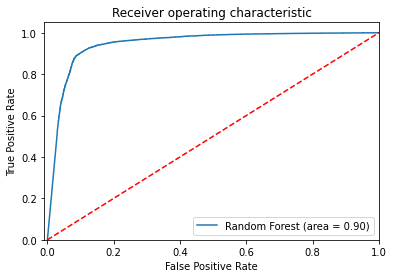

In [ ]:

fpr, tpr, thresholds = roc_curve(y_test, pred_prob_mnb)
plot.figure()
plot.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % acc_value_mnb)
plot.plot([0, 1], [0, 1],'r--')
plot.xlim([-0.01, 1.0])
plot.ylim([0.0, 1.05])
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('Receiver operating characteristic')
plot.legend(loc="lower right")
plot.show()

In [ ]:
#4.2 LR
lr = LogisticRegression(random_state=1, C=1)
lr.fit(x_train_vec, y_train)
pred_value_lr = lr.predict(x_test_vec)
pred_prob_lr = lr.predict_proba(x_test_vec)[:,1]


In [ ]:
acc_value_lr = roc_auc_score(y_test, pred_value_lr)
print(acc_value_lr)


0.9546316752046691


In [ ]:
metrics.roc_auc_score(y_test,pred_prob_lr)


0.9841595577455808

In [ ]:

print(metrics.accuracy_score(y_test,pred_value_lr))
conf_matrix(metrics.confusion_matrix(y_test, pred_value_lr))


0.9549739381168904


In [ ]:

print('Classificaation Report:\n', classification_report(y_test,pred_value_lr))


Classificaation Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      8596
           1       0.95      0.96      0.96      9438

    accuracy                           0.95     18034
   macro avg       0.96      0.95      0.95     18034
weighted avg       0.96      0.95      0.95     18034



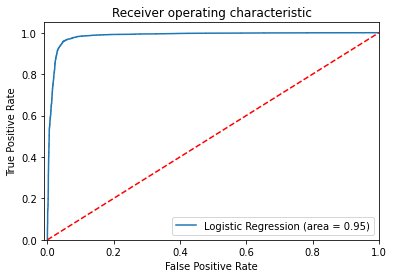

In [ ]:

fpr, tpr, thresholds = roc_curve(y_test, pred_prob_lr)
plot.figure()
plot.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % acc_value_lr)
plot.plot([0, 1], [0, 1],'r--')
plot.xlim([-0.01, 1.0])
plot.ylim([0.0, 1.05])
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('Receiver operating characteristic')
plot.legend(loc="lower right")
plot.show()

In [ ]:
#4.3 RF
rf = RandomForestClassifier(random_state=1)
rf.fit(x_train_vec, y_train)
pred_value_rf = rf.predict(x_test_vec)
pred_prob_rf = rf.predict_proba(x_test_vec)[:,1]


In [ ]:
acc_value_rf = roc_auc_score(y_test, pred_value_rf)
print(acc_value_rf)


0.9350698778075147


In [ ]:
metrics.roc_auc_score(y_test,pred_prob_rf)


0.9849852052990934

In [ ]:
print(metrics.accuracy_score(y_test,pred_value_rf))
conf_matrix(metrics.confusion_matrix(y_test, pred_value_rf))


0.9349007430409227


In [ ]:
print('Classificaation Report:\n', classification_report(y_test,pred_value_rf))


Classificaation Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      8596
           1       0.94      0.93      0.94      9438

    accuracy                           0.93     18034
   macro avg       0.93      0.94      0.93     18034
weighted avg       0.94      0.93      0.93     18034



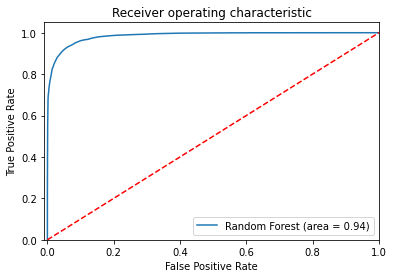

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pred_prob_rf)
plot.figure()
plot.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % acc_value_rf)
plot.plot([0, 1], [0, 1],'r--')
plot.xlim([-0.01, 1.0])
plot.ylim([0.0, 1.05])
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('Receiver operating characteristic')
plot.legend(loc="lower right")
plot.show()


In [ ]:
#4.4 DT
dt = DecisionTreeClassifier(random_state=1)
dt.fit(x_train_vec, y_train)
pred_value_dt = dt.predict(x_test_vec)
pred_prob_dt = dt.predict_proba(x_test_vec)[:,1]


In [ ]:
acc_value_dt = roc_auc_score(y_test, pred_value_dt)
print(acc_value_dt)


0.938797580861543


In [ ]:
metrics.roc_auc_score(y_test,pred_prob_dt)


0.938797580861543

In [ ]:
print(metrics.accuracy_score(y_test,pred_value_dt))
conf_matrix(metrics.confusion_matrix(y_test, pred_value_dt))


0.9395031606964622


In [ ]:
print('Classificaation Report:\n', classification_report(y_test,pred_value_dt))


Classificaation Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      8596
           1       0.93      0.95      0.94      9438

    accuracy                           0.94     18034
   macro avg       0.94      0.94      0.94     18034
weighted avg       0.94      0.94      0.94     18034



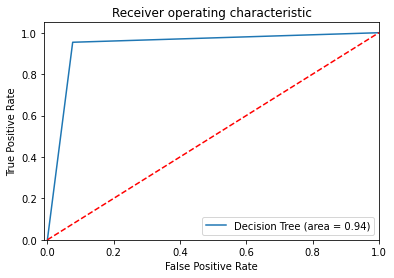

In [ ]:

fpr, tpr, thresholds = roc_curve(y_test, pred_prob_dt)
plot.figure()
plot.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % acc_value_dt)
plot.plot([0, 1], [0, 1],'r--')
plot.xlim([-0.01, 1.0])
plot.ylim([0.0, 1.05])
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('Receiver operating characteristic')
plot.legend(loc="lower right")
plot.show()

In [ ]:
#4.5 SVM
svm = LinearSVC(C=0.2, random_state=1)
svm.fit(x_train_vec, y_train)
pred_value_svm = svm.predict(x_test_vec)
#pred_prob_svm = svm.predict_proba(x_test_vec)[:,1]


In [ ]:
acc_value_svm = roc_auc_score(y_test, pred_value_svm)
print(acc_value_svm)


0.9485717372155038


In [ ]:
print(metrics.accuracy_score(y_test,pred_value_svm))
conf_matrix(metrics.confusion_matrix(y_test, pred_value_svm))


0.9489297992680492


In [ ]:
print('Classificaation Report:\n', classification_report(y_test,pred_value_svm))


Classificaation Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      8596
           1       0.95      0.96      0.95      9438

    accuracy                           0.95     18034
   macro avg       0.95      0.95      0.95     18034
weighted avg       0.95      0.95      0.95     18034



In [ ]:
#4.6 KNN
knn = KNeighborsClassifier()
knn.fit(x_train_vec, y_train)
pred_value_knn = knn.predict(x_test_vec)
pred_prob_knn = knn.predict_proba(x_test_vec)[:,1]


In [ ]:
acc_value_knn = roc_auc_score(y_test, pred_value_knn)
print(acc_value_knn)


0.7758278514497051


In [ ]:

metrics.roc_auc_score(y_test,pred_prob_knn)


0.8386418265378881

In [ ]:
print(metrics.accuracy_score(y_test,pred_value_knn))
conf_matrix(metrics.confusion_matrix(y_test, pred_value_knn))


0.7786957968282133


In [ ]:
print('Classificaation Report:\n', classification_report(y_test,pred_value_knn))


Classificaation Report:
               precision    recall  f1-score   support

           0       0.80      0.71      0.75      8596
           1       0.76      0.84      0.80      9438

    accuracy                           0.78     18034
   macro avg       0.78      0.78      0.78     18034
weighted avg       0.78      0.78      0.78     18034



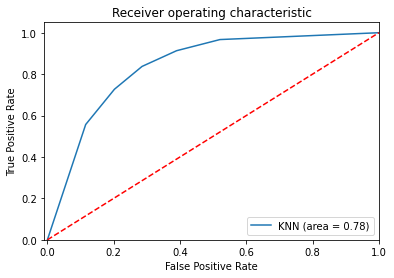

In [ ]:

fpr, tpr, thresholds = roc_curve(y_test, pred_prob_knn)
plot.figure()
plot.plot(fpr, tpr, label='KNN (area = %0.2f)' % acc_value_knn)
plot.plot([0, 1], [0, 1],'r--')
plot.xlim([-0.01, 1.0])
plot.ylim([0.0, 1.05])
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('Receiver operating characteristic')
plot.legend(loc="lower right")
plot.show()


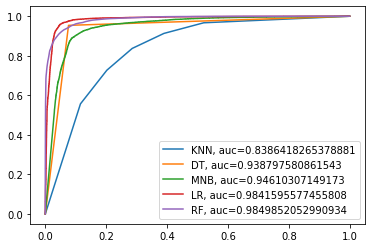

In [ ]:
plot.figure(0).clf()

pred = np.random.rand(1000)
label = np.random.randint(2, size=1000)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob_knn)
auc = metrics.roc_auc_score(y_test,pred_prob_knn)
plot.plot(fpr,tpr,label="KNN, auc="+str(auc))

pred = np.random.rand(1000)
label = np.random.randint(2, size=1000)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob_dt)
auc = metrics.roc_auc_score(y_test,pred_prob_dt)
plot.plot(fpr,tpr,label="DT, auc="+str(auc))

pred = np.random.rand(100)
label = np.random.randint(2, size=100)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob_mnb)
auc = metrics.roc_auc_score(y_test,pred_prob_mnb)
plot.plot(fpr,tpr,label="MNB, auc="+str(auc))

pred = np.random.rand(100)
label = np.random.randint(2, size=100)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob_lr)
auc = metrics.roc_auc_score(y_test,pred_prob_lr)
plot.plot(fpr,tpr,label="LR, auc="+str(auc))

pred = np.random.rand(100)
label = np.random.randint(2, size=100)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob_rf)
auc = metrics.roc_auc_score(y_test,pred_prob_rf)
plot.plot(fpr,tpr,label="RF, auc="+str(auc))

plot.legend(loc=0)

### 5. DL

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(pad_train_s, target_encoded, test_size=0.2, random_state=1)

print("The number of samples in the train set is:", len(X_train), len(y_train))
print("The number of s amples in the test set is:", len(X_test), len(y_test))


In [ ]:
#5.1 CNN

cnn = Sequential()
cnn.add(Embedding(vocab_size, emb, input_length= len_long_s))
cnn.add(Conv1D(filters=64, kernel_size=1, padding='same', activation='relu'))
cnn.add(GlobalMaxPool1D())

cnn.add(Dense(32, activation='relu'))
cnn.add(Dropout(0.2))

cnn.add(Dense(1, activation='sigmoid'))

#Compiling cnn
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20404, 100)        1000000   
                                                                 
 conv1d_1 (Conv1D)           (None, 20404, 64)         6464      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                      

In [ ]:
#fit
cnn_model1 = cnn.fit(X_train, y_train, epochs= 5, verbose=1, validation_data=(X_test,y_test))


In [ ]:
#make a predictions on the test set using CNN
cnn_test_pred = cnn.predict(X_test)

#convert the predicted to binary class labels
cnn_test_pred=np.where(cnn_test_pred>0.5,1,0)

#generate a classification report to show the performance of the model
print('Classificaation Report:\n',classification_report(y_test, cnn_test_pred))


In [ ]:
#create a figure with two subplots
plot.figure(figsize=(10, 10))
plot.subplot(2, 2, 1)
#plot the loss function
plot.plot(cnn_model1.history['loss'], label='Loss')
plot.plot(cnn_model1.history['val_loss'], label='Validation Loss')
plot.legend()
plot.title('Training - Loss Function')
#plot the accuracy
plot.subplot(2, 2, 2)
plot.plot(cnn_model1.history['accuracy'], label='Accuracy')
plot.plot(cnn_model1.history['val_accuracy'], label='Validation Accuracy')
#show plot
plot.legend()
plot.title('Train - Accuracy')

In [ ]:
#confusion_matrix
print(metrics.accuracy_score(y_test,cnn_test_pred))
conf_matrix(metrics.confusion_matrix(y_test, cnn_test_pred))


In [ ]:
print(confusion_matrix(y_test, np.round(cnn_test_pred) ))

# We can even assign variables to the output! adding .ravel() to the conf matrix.
tn, fp, fn, tp = confusion_matrix(y_test, np.round(cnn_test_pred)).ravel()
print(f"TP: {tp}")
print(f"FP: {fp}")
print(f"TN: {tn}")
print(f"FN: {fn}")


In [ ]:
#5.2 LSTM
lstm_model = Sequential()
lstm_model.add(Embedding(vocab_len, output_dim = emb, weights = [emb_matrix] , input_length = len_long_s))
lstm_model.add(LSTM(32, return_sequences= True))
lstm_model.add(Dense(32, activation='relu'))

lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dropout(0.2))

#lstm_model.add(Dense(1, kernel_regularizer= tf.keras.regularizers.l1(0.003) , activation='linear'))
lstm_model.add(Dense(1,  activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
lstm_model.summary()


In [ ]:
#fitting with 5 epochs and 40 batch_size
lstm_result = lstm_model.fit(X_train, y_train, epochs= 5, batch_size= 40 , verbose=1 , validation_data= (X_test,y_test))


In [ ]:
#predicts the labels for the test data using the LSTM model
lstm_test_pred = lstm_model.predict(X_test)

#convert the predicted probabilities to binary labels (0 or 1)
lstm_test_pred=np.where(lstm_test_pred>0.5,1,0)

#generate a classification report to show the performance of the model
print('Classificaation Report:\n',classification_report(y_test, lstm_test_pred))


In [ ]:
plot.figure(figsize=(10, 10))

plot.subplot(2, 2, 1)
plot.plot(lstm_result.history['loss'], label='Loss')
plot.plot(lstm_result.history['val_loss'], label='Validation Loss')
plot.legend()
plot.title('Training - Loss Function')

plot.subplot(2, 2, 2)
plot.plot(lstm_result.history['accuracy'], label='Accuracy')
plot.plot(lstm_result.history['val_accuracy'], label='Validation Accuracy')
plot.legend()
plot.title('Train - Accuracy')

In [ ]:

print(metrics.accuracy_score(y_test,lstm_test_pred))
conf_matrix(metrics.confusion_matrix(y_test, lstm_test_pred))


In [ ]:
# Ground truth Y data, predicted Y data.
# We have to threshold our network ourselves currently due to the sigmoid output.
# We can interpret this output as a form of probability or confidence value. Closer to 1, the more probable.
# We will assume that >= 0.5 is a 1, and < 0.5 is a 0.

print(confusion_matrix(y_test, np.round(lstm_test_pred)))

# We can even assign variables to the output! adding .ravel() to the conf matrix.
tn, fp, fn, tp = confusion_matrix(y_test, np.round(lstm_test_pred)).ravel()
print(f"TP: {tp}")
print(f"FP: {fp}")
print(f"TN: {tn}")
print(f"FN: {fn}")

### 6 Hybrid Approach

In [ ]:
#CNN & LSTM 
#combination of CNN-RNN(LSTM)
#output from CNN with Conv1D is used as input for RNN with LSTM (with Lasso Regularization, Dropout)
#model Definition with CNN (Conv1D)
from keras.regularizers import Regularizer

hybrid = Sequential()
hybrid.add(Embedding(vocab_len, output_dim = emb, weights = [emb_matrix] , input_length = len_long_s))
hybrid.add(Conv1D(filters=64, kernel_size=1, padding='same', activation='relu'))

hybrid.add(MaxPooling1D(pool_size=2, padding='same'))
hybrid.add(Bidirectional(LSTM(32)))

hybrid.add(Dense(64, kernel_regularizer= tf.keras.regularizers.l1(0.003) , activation='linear'))
hybrid.add(Dropout(0.5))

hybrid.add(Dense(1, activation='linear'))

hybrid.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
hybrid.summary()


In [ ]:
#fit
h_result = hybrid.fit(X_train, y_train, epochs= 5,  verbose=1, validation_data= (X_test,y_test))


In [ ]:

h_test_pred = hybrid.predict(X_test)
h_test_pred=np.where(h_test_pred>0.5,1,0)
print('Classificaation Report:\n',classification_report(y_test, h_test_pred))


In [ ]:
plot.figure(figsize=(10, 10))

plot.subplot(2, 2, 1)
plot.plot(h_result.history['loss'], label='Loss')
plot.plot(h_result.history['val_loss'], label='Validation Loss')
plot.legend()
plot.title('Training - Loss Function')

plot.subplot(2, 2, 2)
plot.plot(h_result.history['accuracy'], label='Accuracy')
plot.plot(h_result.history['val_accuracy'], label='Validation Accuracy')
plot.legend()
plot.title('Train - Accuracy')

In [ ]:
#confusion_matrix
print(metrics.accuracy_score(y_test,h_test_pred))
conf_matrix(metrics.confusion_matrix(y_test, h_test_pred))


In [ ]:

print(confusion_matrix(y_test, np.round(h_test_pred) ))

# We can even assign variables to the output! adding .ravel() to the conf matrix.
tn, fp, fn, tp = confusion_matrix(y_test, np.round(h_test_pred)).ravel()
print(f"TP: {tp}")
print(f"FP: {fp}")
print(f"TN: {tn}")
print(f"FN: {fn}")